<a href="https://colab.research.google.com/github/CatherineDemian/CatherineDemian-optimizer-comparison-cifar10-/blob/main/nadam_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/300
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2907 - loss: 1.9901 - val_accuracy: 0.3721 - val_loss: 1.7906
Epoch 2/300
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3830 - loss: 1.7593 - val_accuracy: 0.4023 - val_loss: 1.7156
Epoch 3/300
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4116 - loss: 1.6863 - val_accuracy: 0.4177 - val_loss: 1.6635
Epoch 4/300
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4292 - loss: 1.6349 - val_accuracy: 0.4281 - val_loss: 1.6295
Epoch 5/300
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4442 - loss: 1.5943 - val_accuracy: 0.4369 - val_loss: 1.6028
Epoch 6/300
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4568 - loss: 1.5607 - val_accuracy: 0.4449 - val_loss: 1.5845
Epoch 7/300
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4663 - loss: 1.5333 - val_accuracy: 0.4508 - val_loss: 1.5663
Epoch 8/300
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4777 - loss: 1

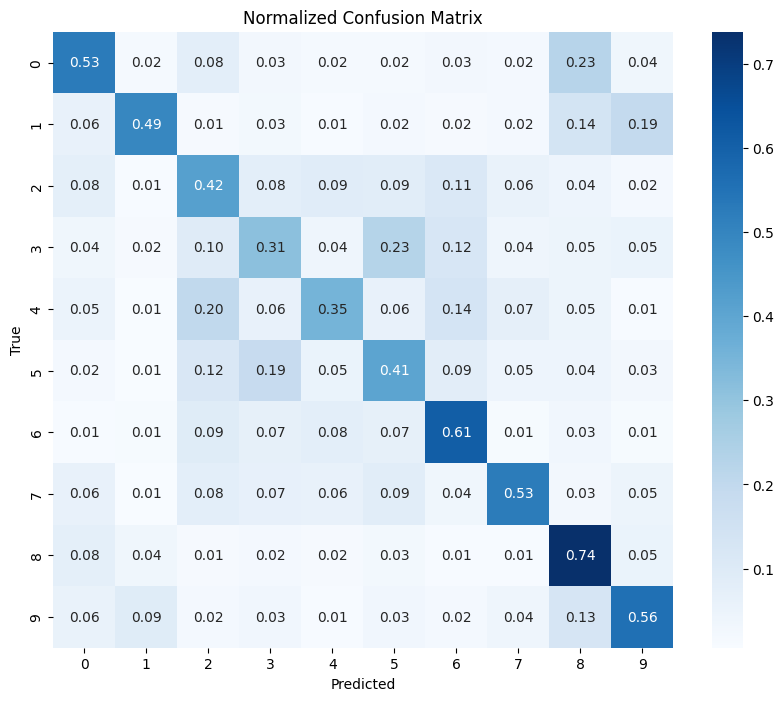

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.54      0.53      0.53      1000
     Class 1       0.70      0.49      0.58      1000
     Class 2       0.37      0.42      0.39      1000
     Class 3       0.35      0.31      0.33      1000
     Class 4       0.48      0.35      0.41      1000
     Class 5       0.39      0.41      0.40      1000
     Class 6       0.51      0.61      0.56      1000
     Class 7       0.62      0.53      0.57      1000
     Class 8       0.50      0.74      0.60      1000
     Class 9       0.55      0.56      0.55      1000

    accuracy                           0.49     10000
   macro avg       0.50      0.49      0.49     10000
weighted avg       0.50      0.49      0.49     10000



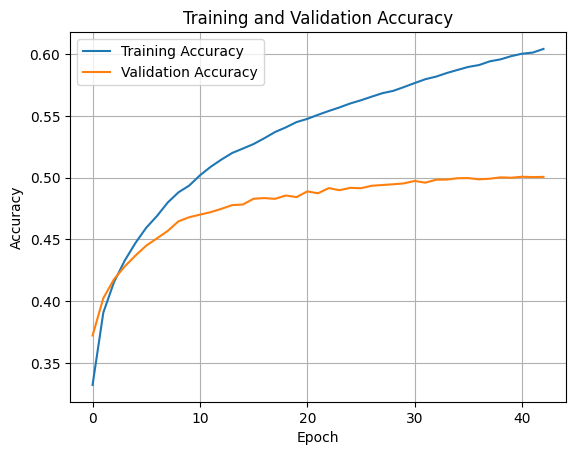

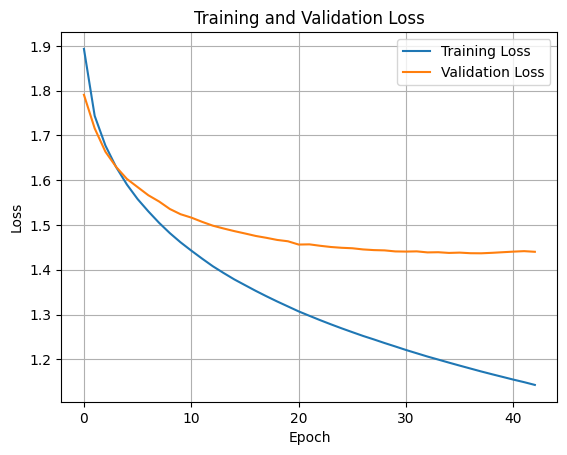

Training time: 185.68 seconds


In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.optimizers import Nadam
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import time

# Set random seed for reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Flatten the images into a 1D array (shallow NN requires flat input)
x_train_flat = x_train.reshape(-1, 32 * 32 * 3)
x_test_flat = x_test.reshape(-1, 32 * 32 * 3)

# Split the training data into 80% training and 20% validation
x_train, x_val, y_train, y_val = train_test_split(
    x_train_flat, y_train, test_size=0.2, random_state=seed
)

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Define the shallow neural network model architecture
def create_model():
    model = models.Sequential([
        layers.Dense(256, activation='relu', input_shape=(3072,)),  # Hidden layer
        layers.Dense(10, activation='softmax')  # Output layer for 10 classes
    ])
    return model

# Define Nadam optimizer
optimizer = Nadam(
    learning_rate=0.0001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07
)

# Compile the model
model = create_model()
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping setup
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=8,
    min_delta=0.001,
    restore_best_weights=True
)

# Measure the training time
start_time = time.time()
history = model.fit(
    x_train, y_train,
    epochs=300,
    validation_data=(x_val, y_val),
    batch_size=32,
    callbacks=[early_stop]
)
training_time = time.time() - start_time

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test_flat, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Generate predictions and confusion matrix
y_pred = model.predict(x_test_flat)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Normalize the confusion matrix by row (true class count)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the normalized confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Normalized Confusion Matrix')
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=[f'Class {i}' for i in range(10)]))

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid()
plt.show()

# Print the training time
print(f"Training time: {training_time:.2f} seconds")


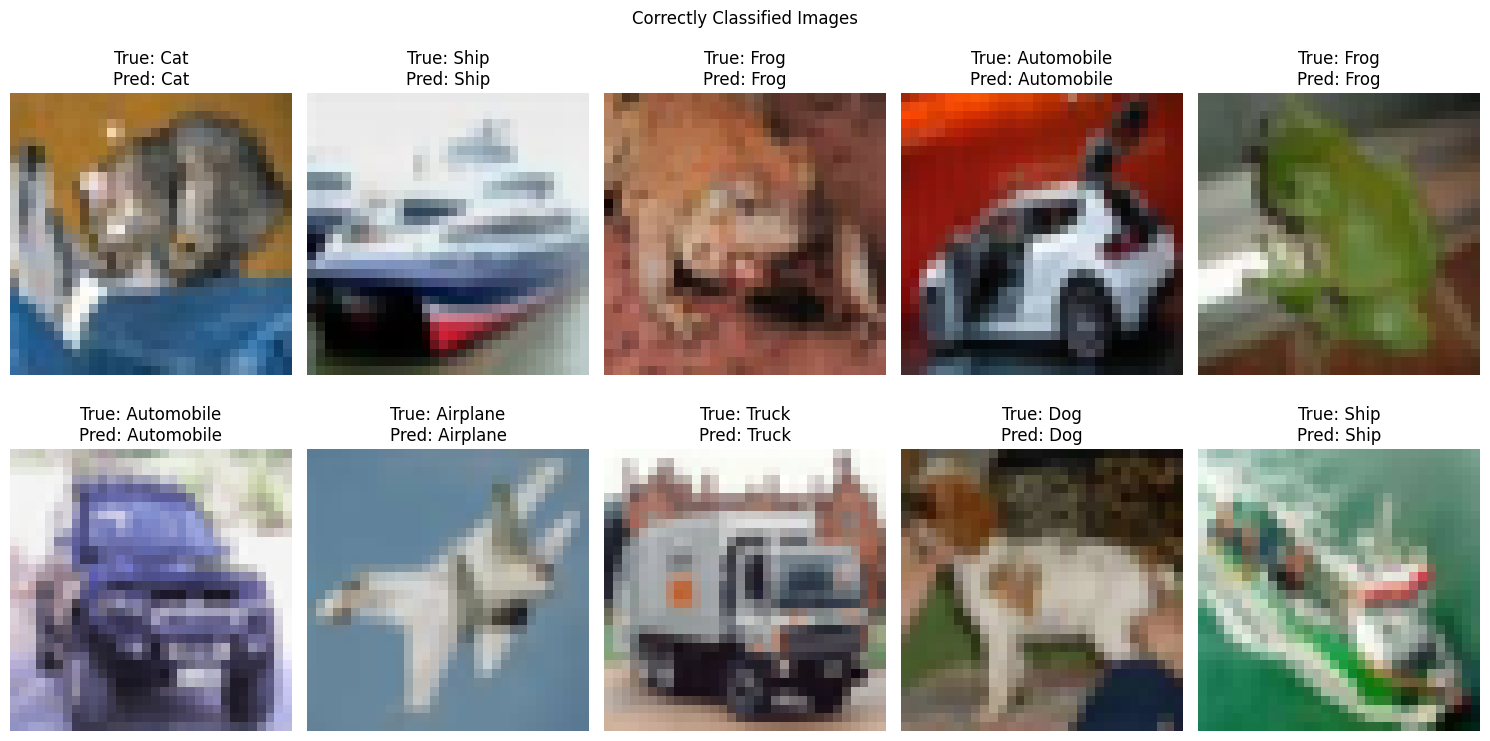

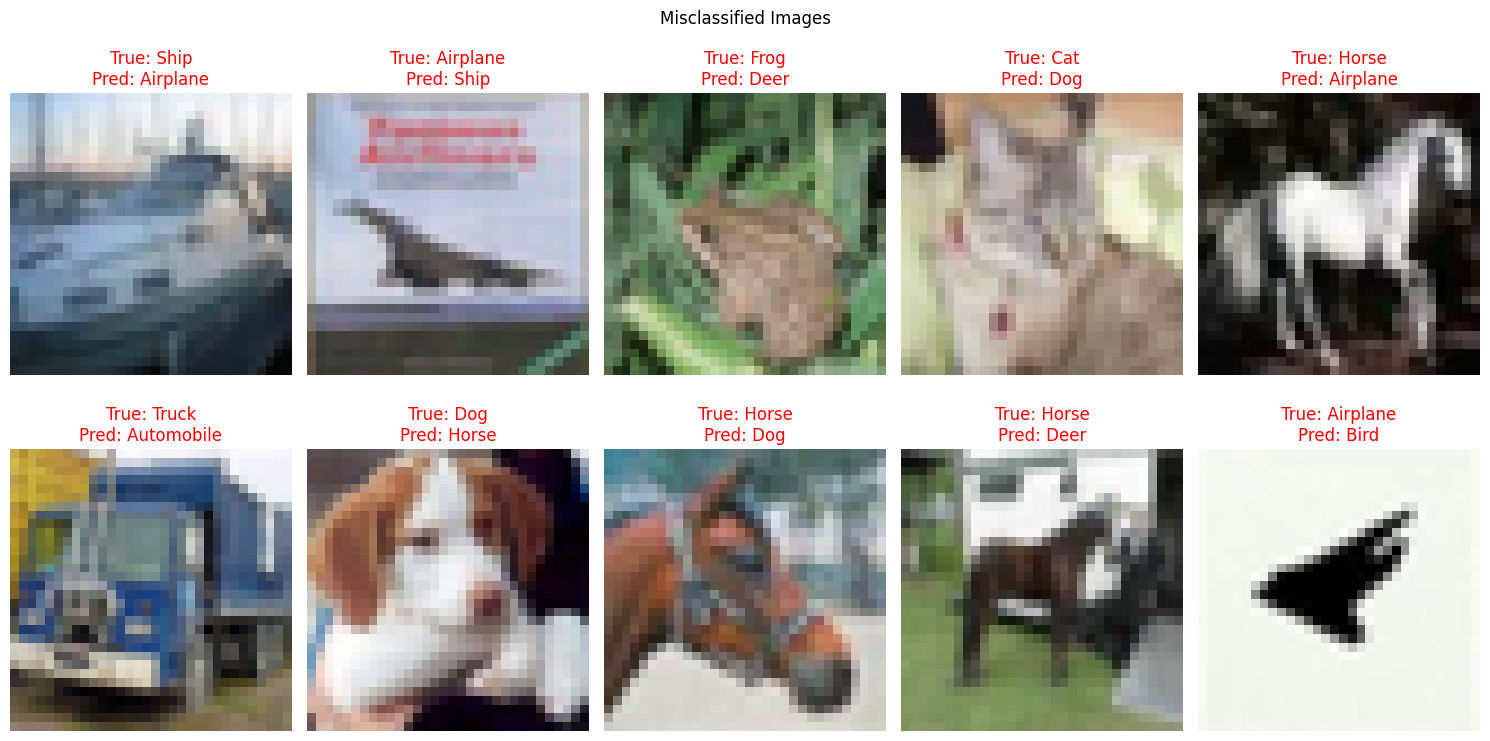

In [ ]:
# Map numeric labels to CIFAR-10 class names
class_names = [
    'Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
    'Dog', 'Frog', 'Horse', 'Ship', 'Truck'
]

# Get correctly and incorrectly classified indices
correct_indices = np.where(y_true == y_pred_classes)[0]
incorrect_indices = np.where(y_true != y_pred_classes)[0]

# Plot correctly classified images
plt.figure(figsize=(15, 8))
for i, idx in enumerate(correct_indices[:10]):  # Display 10 correct samples
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[idx].reshape(32, 32, 3))
    plt.title(f"True: {class_names[y_true[idx]]}\nPred: {class_names[y_pred_classes[idx]]}")
    plt.axis('off')
plt.suptitle("Correctly Classified Images")
plt.tight_layout()
plt.show()

# Plot misclassified images
plt.figure(figsize=(15, 8))
for i, idx in enumerate(incorrect_indices[:10]):  # Display 10 incorrect samples
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[idx].reshape(32, 32, 3))
    plt.title(f"True: {class_names[y_true[idx]]}\nPred: {class_names[y_pred_classes[idx]]}", color='red')
    plt.axis('off')
plt.suptitle("Misclassified Images")
plt.tight_layout()
plt.show()


Nadam with Exponential Decay

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/300
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2907 - loss: 2.0067 - val_accuracy: 0.3863 - val_loss: 1.7364
Epoch 2/300
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3887 - loss: 1.7154 - val_accuracy: 0.4123 - val_loss: 1.6704
Epoch 3/300
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4232 - loss: 1.6363 - val_accuracy: 0.4210 - val_loss: 1.6388
Epoch 4/300
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4411 - loss: 1.5883 - val_accuracy: 0.4296 - val_loss: 1.6052
Epoch 5/300
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4527 - loss: 1.5517 - val_accuracy: 0.4371 - val_loss: 1.5801
Epoch 6/300
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4656 - loss: 1.5217 - val_accuracy: 0.4392 - val_loss: 1.5702
Epoch 7/300
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4717 - loss: 1.5000 - val_accuracy: 0.4416 - val_loss: 1.5543
Epoch 8/300
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4790 - loss: 1

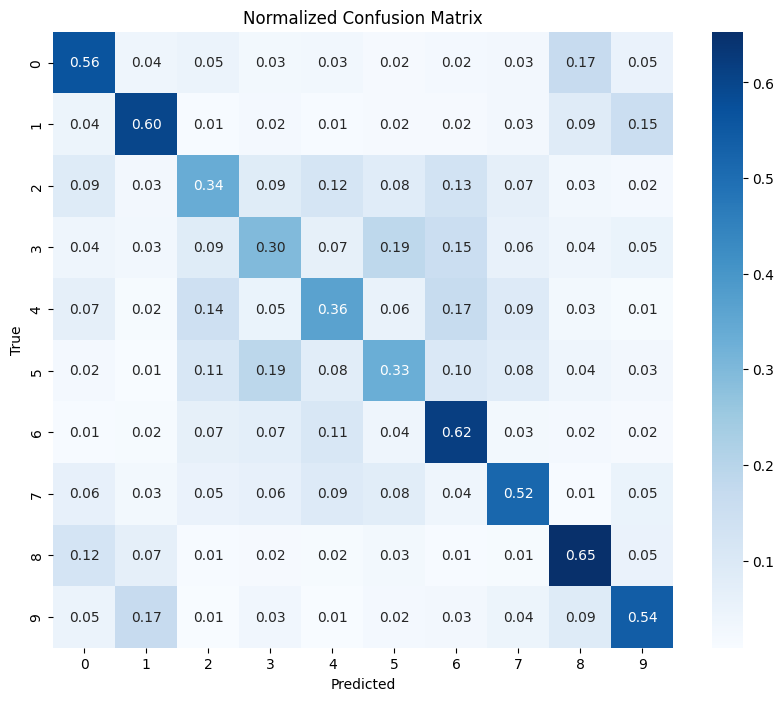

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.53      0.56      0.54      1000
     Class 1       0.60      0.60      0.60      1000
     Class 2       0.38      0.34      0.36      1000
     Class 3       0.34      0.30      0.32      1000
     Class 4       0.40      0.36      0.38      1000
     Class 5       0.38      0.33      0.36      1000
     Class 6       0.48      0.62      0.54      1000
     Class 7       0.54      0.52      0.53      1000
     Class 8       0.56      0.65      0.60      1000
     Class 9       0.55      0.54      0.54      1000

    accuracy                           0.48     10000
   macro avg       0.48      0.48      0.48     10000
weighted avg       0.48      0.48      0.48     10000



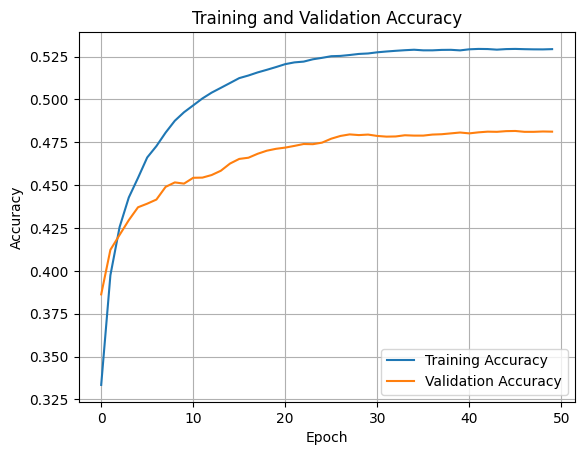

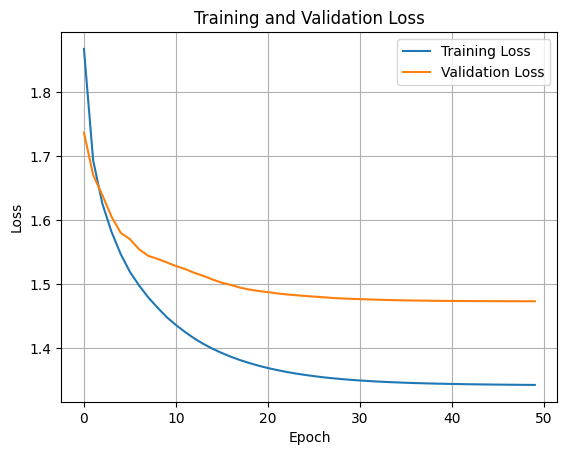

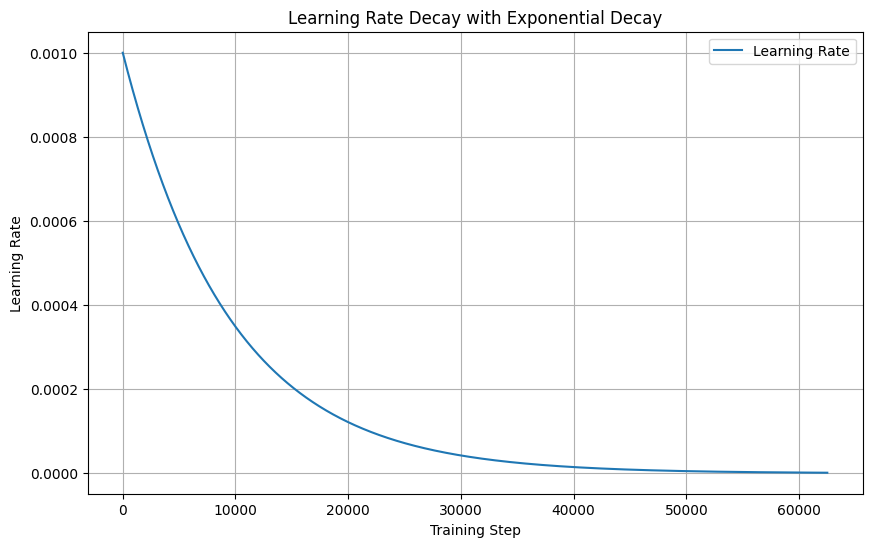

Training time: 190.32 seconds


In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.optimizers import SGD, Nadam
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import time

# Set random seed for reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

# Learning Rate Scheduler for Nadam
lr_schedule_nadam = ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=1000,
    decay_rate=0.9,
    staircase=False
)

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Flatten the images into a 1D array (shallow NN requires flat input)
x_train_flat = x_train.reshape(-1, 32 * 32 * 3)
x_test_flat = x_test.reshape(-1, 32 * 32 * 3)

# Split the training data into 80% training and 20% validation
x_train, x_val, y_train, y_val = train_test_split(
    x_train_flat, y_train, test_size=0.2, random_state=seed
)

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Define the shallow neural network model architecture
def create_model():
    model = models.Sequential([
        layers.Dense(256, activation='relu', input_shape=(3072,)),  # Hidden layer
        layers.Dense(10, activation='softmax')  # Output layer for 10 classes
    ])
    return model

# Define Nadam optimizer with learning rate scheduler
optimizer_nadam = Nadam(
    learning_rate=lr_schedule_nadam,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07
)

# Compile the model
model = create_model()
model.compile(optimizer=optimizer_nadam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping setup
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=8,
    min_delta=0.001,
    restore_best_weights=True
)

# Measure the training time
start_time = time.time()
history = model.fit(
    x_train, y_train,
    epochs=300,
    validation_data=(x_val, y_val),
    batch_size=32,
    callbacks=[early_stop]
)
training_time = time.time() - start_time

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test_flat, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Generate predictions and confusion matrix
y_pred = model.predict(x_test_flat)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Normalize the confusion matrix by row (true class count)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the normalized confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Normalized Confusion Matrix')
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=[f'Class {i}' for i in range(10)]))

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid()
plt.show()

# Define training steps based on actual epochs
epochs_trained = len(history.epoch)
steps_per_epoch = len(x_train) // 32  # Calculate steps per epoch dynamically
total_steps = steps_per_epoch * epochs_trained  # Total steps trained
steps = np.arange(0, total_steps, 1)  # Generate step indices

# Get the learning rate for each step
learning_rates = [float(lr_schedule_nadam(step)) for step in steps]

# Plot the learning rate over steps
plt.figure(figsize=(10, 6))
plt.plot(steps, learning_rates, label='Learning Rate')
plt.xlabel('Training Step')
plt.ylabel('Learning Rate')
plt.title('Learning Rate Decay with Exponential Decay')
plt.legend()
plt.grid()
plt.show()


# Print the training time
print(f"Training time: {training_time:.2f} seconds")


Nadam with Step Learning Scheduler

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/300
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.2882 - loss: 2.0015 - val_accuracy: 0.3772 - val_loss: 1.7491 - learning_rate: 0.0010
Epoch 2/300
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.3856 - loss: 1.7237 - val_accuracy: 0.4036 - val_loss: 1.6773 - learning_rate: 0.0010
Epoch 3/300
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4162 - loss: 1.6475 - val_accuracy: 0.4128 - val_loss: 1.6512 - learning_rate: 0.0010
Epoch 4/300
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4299 - loss: 1.6018 - val_accuracy: 0.4221 - val_loss: 1.6315 - learning_rate: 0.0010
Epoch 5/300
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4455 - loss: 1.5678 - val_accuracy: 0.4300 - val_loss: 1.6110 - learning_rate: 0.0010
Epoch 6/300
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4543 - loss: 1.5437 - val_accuracy: 0.4283 - val_loss: 1.6085 - learning_rate: 0.0010
Epoch 7/300
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4

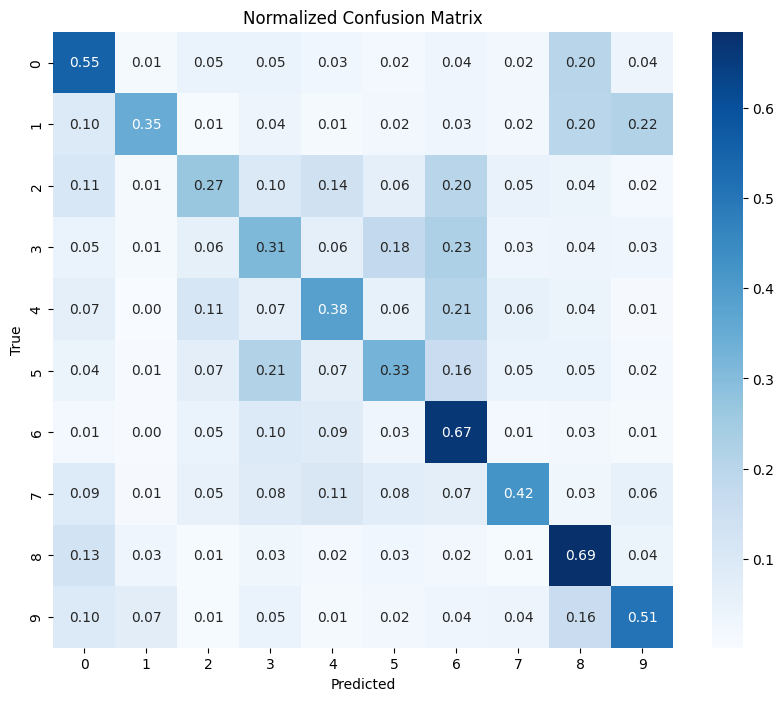

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.45      0.55      0.49      1000
     Class 1       0.68      0.35      0.46      1000
     Class 2       0.39      0.27      0.32      1000
     Class 3       0.30      0.31      0.31      1000
     Class 4       0.42      0.38      0.40      1000
     Class 5       0.40      0.33      0.36      1000
     Class 6       0.40      0.67      0.50      1000
     Class 7       0.59      0.42      0.49      1000
     Class 8       0.47      0.69      0.55      1000
     Class 9       0.54      0.51      0.52      1000

    accuracy                           0.45     10000
   macro avg       0.46      0.45      0.44     10000
weighted avg       0.46      0.45      0.44     10000



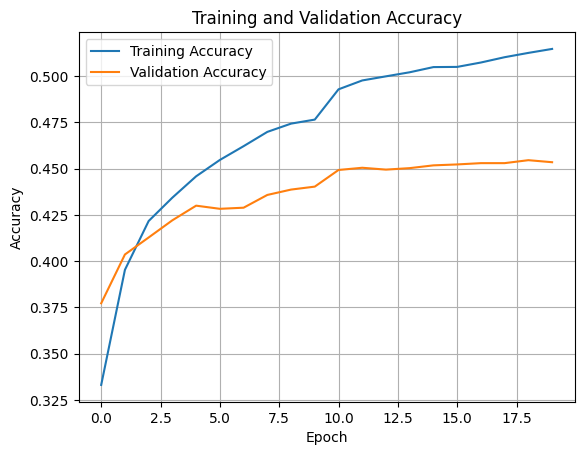

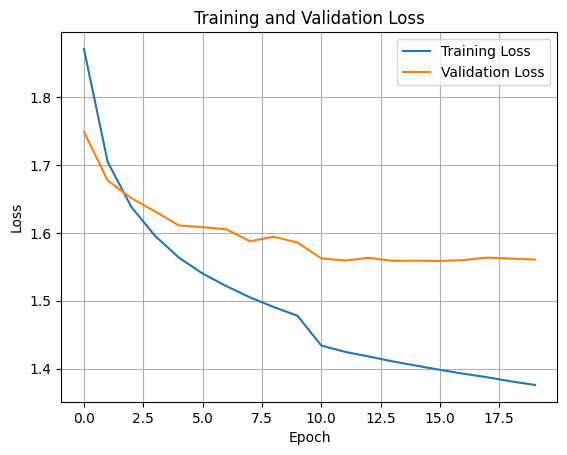

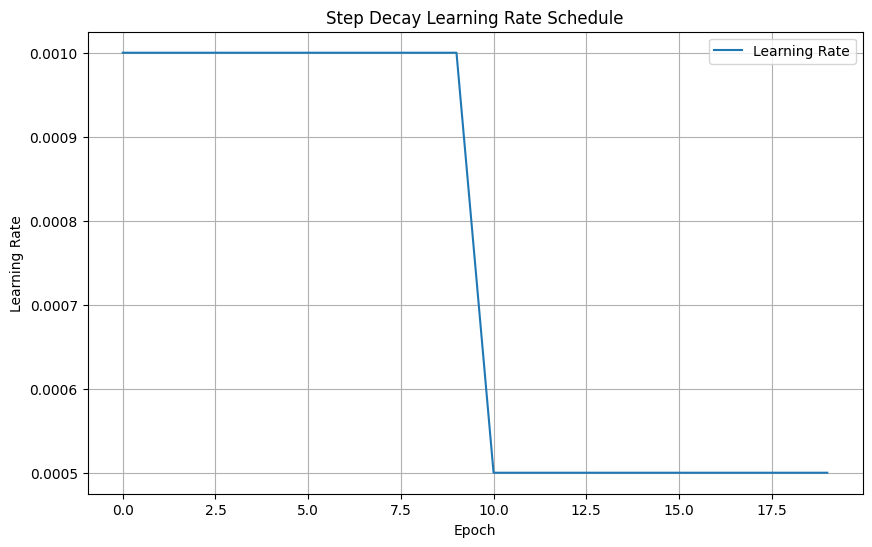

Training time: 79.95 seconds


In [ ]:
import time
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Set random seed for reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Flatten the images into a 1D array
x_train_flat = x_train.reshape(-1, 32 * 32 * 3)
x_test_flat = x_test.reshape(-1, 32 * 32 * 3)

# Split the training data into 80% training and 20% validation
x_train, x_val, y_train, y_val = train_test_split(
    x_train_flat, y_train, test_size=0.2, random_state=seed
)

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Define the shallow neural network model architecture
def create_model():
    model = models.Sequential([
        layers.Dense(256, activation='relu', input_shape=(3072,)),  # Hidden layer
        layers.Dense(10, activation='softmax')  # Output layer for 10 classes
    ])
    return model

# Define step decay schedule
def step_decay_schedule(initial_lr, drop_factor, epochs_drop):
    def schedule(epoch):
        return initial_lr * (drop_factor ** (epoch // epochs_drop))
    return schedule

# Set parameters for step decay
initial_lr = 0.001  # Starting learning rate
drop_factor = 0.5   # Reduce by half
epochs_drop = 10    # Every 10 epochs

# Create step decay schedule
step_decay = step_decay_schedule(initial_lr, drop_factor, epochs_drop)
lr_scheduler = LearningRateScheduler(step_decay)

# Nadam optimizer
optimizer = Nadam(
    learning_rate=initial_lr,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07
)

# Compile the model
model = create_model()
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping setup
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=8,
    min_delta=0.001,
    restore_best_weights=True
)

# Train the model
start_time = time.time()
history = model.fit(
    x_train, y_train,
    epochs=300,
    validation_data=(x_val, y_val),
    batch_size=32,
    callbacks=[early_stop, lr_scheduler]
)
training_time = time.time() - start_time

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test_flat, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Generate predictions and confusion matrix
y_pred = model.predict(x_test_flat)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Normalize the confusion matrix by row (true class count)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the normalized confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Normalized Confusion Matrix')
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=[f'Class {i}' for i in range(10)]))

# Plot training & validation accuracy
plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot training & validation loss
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid()
plt.show()

# Plot learning rate schedule
epochs_trained = len(history.epoch)
learning_rates = [step_decay(epoch) for epoch in range(epochs_trained)]

plt.figure(figsize=(10, 6))
plt.plot(range(epochs_trained), learning_rates, label='Learning Rate')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Step Decay Learning Rate Schedule')
plt.legend()
plt.grid()
plt.show()

# Print the training time
print(f"Training time: {training_time:.2f} seconds")
